# Student 23248912
## James Bentley


Open a new Jupyter notebook and name it etivity3_regression.ipynb. In this notebook, train three regression pipelines with Random Forest, Linear Regression and a third regressor of your choice as the final estimator, respectively, for predicting the value of `insurance_cost`.

Requirements:

    For each regressor, include data preparation and dimensionality reduction steps in the main pipeline.
    You can choose any regressor as the third one. Some options are SVR and MLPRegressor, but you are not limited to them.
    For the dimensionality reduction step use PCA, RFE and a third dimensionality reduction (incl. feature selection) technique in at least one pipeline.
    Use grid search for hyperparameter tuning and replicate the process in the example notebook Tutorial 3-2 - Regression and Dimensionality Reduction.ipynb to evaluate and compare the models you have trained and pick the best one.
    Summarise your experience in a markdown cell (max 150 words in a markdown cell).


In [19]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, TransformedTargetRegressor)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
import pickle
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_regression


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# EDA
Data was explored in Classification task. As this is regression I will not make Insurance_cost Binary

In [8]:
df = pd.read_csv('./insurance.csv')

In [11]:
df.head()

age  gender     bmi  children smoker     region  insurance_cost
0   18    male  33.770         1     no  southeast      1725.55230
1   18    male  34.100         0     no  southeast      1137.01100
2   18  female  26.315         0     no  northeast      2198.18985
3   18  female  38.665         2     no  northeast      3393.35635
4   18  female  35.625         0     no  northeast      2211.13075

In [13]:
# Split data
X = df.drop('insurance_cost', axis=1)
y = df['insurance_cost']

# Define numeric features and transformer
numeric_features = ['age', 'bmi', 'children']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Define categorical features and transformer
categorical_features = ['gender', 'smoker', 'region']
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# RF Regressor

In [24]:
#Forest regression model
rf_regressor = RandomForestRegressor()

# Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA()),
                           ('regressor', rf_regressor)])

# GridSearch Params 
param_grid_rf = {
    'pca__n_components': [2, 3, 4, 5],
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# GridSearch
grid_search = GridSearchCV(pipeline, param_grid_rf, cv=5, n_jobs=-1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
grid_search.fit(X_train, y_train)

# Predictions
y_pred = grid_search.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Best params
print("Best Parameters:", grid_search.best_params_)


RF_best_params = grid_search.best_params_
RF_best_model = grid_search.best_estimator_

Mean Squared Error: 55515828.78115882
Best Parameters: {'pca__n_components': 5, 'regressor__max_depth': None, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}


# Linear Regression 

In [23]:
# Create the Linear Regression model
lr_regressor = LinearRegression()

# Create the pipeline with RFE
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', RFE(estimator=lr_regressor)),
                           ('regressor', lr_regressor)])

# Define parameter grid for GridSearchCV
param_grid_lr = {
    'feature_selection__n_features_to_select': [2, 3, 4, 5],
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid_lr, cv=5, n_jobs=-1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
grid_search.fit(X_train, y_train)

# Predictions
y_pred = grid_search.predict(X_test)

# Evaluate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

#store
LR_best_params = grid_search.best_params_
LR_best_model = grid_search.best_estimator_


Mean Squared Error: 35691171.12629409
Best Parameters: {'feature_selection__n_features_to_select': 5}


# SVR


In [22]:
# SVR model
svr_regressor = SVR()

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', SelectKBest(score_func=f_regression)),
                           ('regressor', svr_regressor)])

# Define parameter grid for GridSearchCV
param_grid_svr = {
    'feature_selection__k': [2, 3, 4, 5],  # Number of top features to select
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__epsilon': [0.1, 0.2, 0.3],
    'regressor__kernel': ['linear', 'rbf', 'poly']
}

# Gridsearch
grid_search = GridSearchCV(pipeline, param_grid_svr, cv=5, n_jobs=-1)

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
grid_search.fit(X_train, y_train)

# Predictions
y_pred = grid_search.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# params
print("Best Parameters:", grid_search.best_params_)


SVR_best_params = grid_search.best_params_
SVR_best_model = grid_search.best_estimator_

Mean Squared Error: 61807982.38879304
Best Parameters: {'feature_selection__k': 5, 'regressor__C': 100, 'regressor__epsilon': 0.1, 'regressor__kernel': 'linear'}


# Evaluate models 

In [29]:
def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
        
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
            
    return _mse, _mae, _r2

In [30]:
RF_mse, RF_mae, RF_r2 = evaluate_model(X_test, y_test, RF_best_model)
LR_mse, LR_mae, LR_r2 = evaluate_model(X_test, y_test, LR_best_model)
SVR_mse, SVR_mae, SVR_r2 = evaluate_model(X_test, y_test, SVR_best_model)

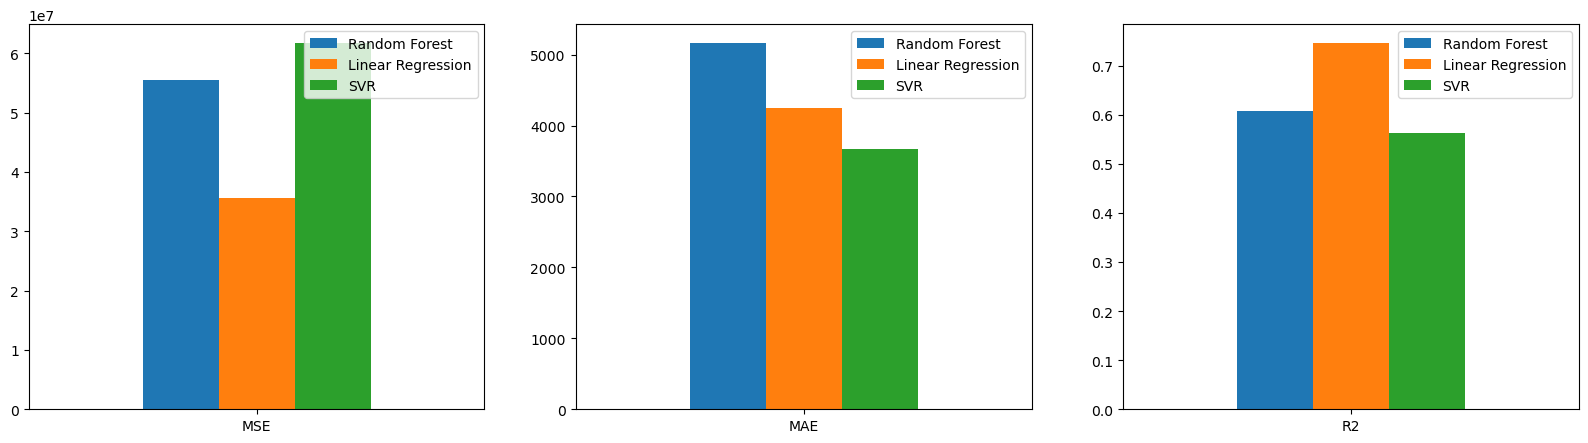

In [34]:
df_mse = pd.DataFrame({'Random Forest': RF_mse, 'Linear Regression': LR_mse, 'SVR': SVR_mse}, index=['MSE'])
df_mae = pd.DataFrame({'Random Forest': RF_mae, 'Linear Regression': LR_mae, 'SVR' : SVR_mae}, index=['MAE'])
df_r2 = pd.DataFrame({'Random Forest': RF_r2, 'Linear Regression': LR_r2, 'SVR' : SVR_r2}, index=['R2'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

df_mse.plot.bar(rot=0, ax=axes[0])
df_mae.plot.bar(rot=0, ax=axes[1])
df_r2.plot.bar(rot=0, ax=axes[2])

plt.show()

In [35]:
print("Random Forest:")
print(f"MSE: {RF_mse}")
print(f"MAE: {RF_mae}")
print(f"R2: {RF_r2}\n")

print("Linear Regression:")
print(f"MSE: {LR_mse}")
print(f"MAE: {LR_mae}")
print(f"R2: {LR_r2}\n")

print("SVR:")
print(f"MSE: {SVR_mse}")
print(f"MAE: {SVR_mae}")
print(f"R2: {SVR_r2}\n")

Random Forest:
MSE: 55515828.78115882
MAE: 5169.6452085916835
R2: 0.606964412237111

Linear Regression:
MSE: 35691171.12629409
MAE: 4254.504925589903
R2: 0.7473171034360979

SVR:
MSE: 61807982.38879304
MAE: 3675.311502398338
R2: 0.56241783253604



Test conclude that Linear Regression has the lowest MSE and Higest R2, which Is the most desireable. However, SVR has the Lowest MAE.

Why? The comparison of the 3 models reveals varying performance metrics. Random Forest Regression had an MSE of approximately 55.5 million, an MAE of around 5169.6, and an R2 score of  0.607. Linear Regression outperformed with an MSE of about 35.7 million, an MAE of roughly 4254.5, and an R2 score of approximately 0.747, indicating its better fit to the data.

Support Vector Regression showed a higher MSE of around 61.8 million, a lower MAE of approximately 3675.3, and an R2 score of about 0.562. Linear Regression demonstrated the most favorable performance among the models, showcasing its efficacy in capturing the underlying patterns within the data.